# Straightening an image distorted by perspective (rectification)
In this notebook, we explore how to straighten a rectangular sheet distorted by perspective, given the coordinates of four points corresponding to its four corners.

We consider the following image as an example

In [1]:
import skimage
import skimage.io
import matplotlib.pyplot as plt
import numpy as np
import skimage.viewer
import skimage.transform

url = "https://global-uploads.webflow.com/5a9d5f4fda615c00014ad29e/5bf2c4bf3466fdfafb66a820_Passport%203_cropped_p-p-2000.jpeg"
im = skimage.io.imread(url)
plt.imshow(im)

/tmp/ipykernel_1047/1600067416.py:5: UserWarning: viewer requires Qt
  import skimage.viewer


HTTPError: HTTP Error 403: Forbidden

Let's consider the coordinates of the points at the four corners of the rectangle we want to rectify.  To find them, we use a viewer tool which shows the coordinates on the bottom left.  Otherwise, you can approximate the coordinates from the image above.

In [ ]:
viewer = skimage.viewer.ImageViewer(im)
viewer.show()

In the following code, lowercase will denote the coordinates on the image.

Uppercase will denote the coordinates on the target (i.e. a frame of reference that is straight on the passport face).

In [ ]:
a = np.array([1177,740])
b = np.array([1901,479])
c = np.array([1332,5])
d = np.array([711,188])

In [ ]:
# Let's draw these points
plt.imshow(im)
plt.plot(a[0],a[1],'ob')
plt.text(a[0],a[1],'  a', color="b")
plt.plot(b[0],b[1],'ob')
plt.text(b[0],b[1],'  b', color="b")
plt.plot(c[0],c[1],'ob')
plt.text(c[0],c[1],'  c', color="b")
plt.plot(d[0],d[1],'ob')
plt.text(d[0],d[1],'  d', color="b")

We are going to map these points to the four corners of a rectangular image.
The size of a passport is 88 × 125 mm.  So if we map the passport face to an image that has 10 pixels per mm, we want the points a,b,c,d in the image to correspond to the following coordinate on the passport face (remember the reference frame is on the top left and the y axis faces down).

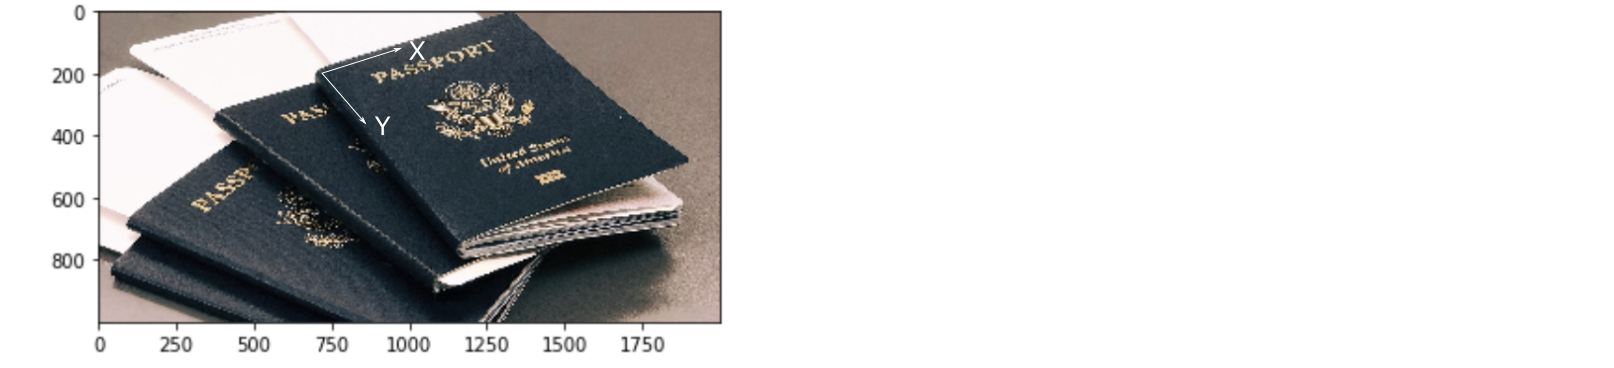

In [ ]:
w,h = 880,1250 # we assume 10 pixels per mm
A = np.array([0,h])
B = np.array([w,h])
C = np.array([w,0])
D = np.array([0,0])

We now create an object that maps each coordinate on the passport face to the corresponding coordinate in the image

In [ ]:
invtf = skimage.transform.estimate_transform("projective",
    src=np.vstack((A,B,C,D)),
    dst=np.vstack((a,b,c,d)))

In [ ]:
invtf((0,0)) # Where is the top-left point of the passport in the image?

In [ ]:
M = invtf((0,h/2)) # Where is the middle point of the left edge of the passport in the image?
print(M)
plt.imshow(im)
plt.plot(M[0,0],M[0,1],'ow')
plt.text(M[0,0],M[0,1],'  middle point of left edge', color="w")

In [ ]:
# Let's draw a point every 5 mm
fig,ax = plt.subplots(figsize=(12,6))
plt.imshow(im)
for x in np.arange(0,w,50):
    for y in np.arange(0,h,50):
        p = invtf((x,y))
        plt.plot(p[0,0],p[0,1],'b.')

In [ ]:
# If we pick 10 points per mm, and copy the corresponding color in a new image...
tim = skimage.transform.warp(image=im, 
                             inverse_map=invtf, 
                             output_shape=(h,w) # columns,rows
)
plt.imshow(tim)